# 1
1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.


The standard deviation tells us how the data points are distributed in the dataset - it shows how different the individual values are from the mean.

The standard error of the mean (SEM) is different. It tells us how different we would expect the mean (or average) to be between samples if we took many samples from the same population.

# 2
2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

Start with the sample mean. Then multiply the SEM by the critical value of the normal distribution. For a 95% confidence interval, this value is usually 1.96. Finally, add and subtract this product (SEM × 1.96) from the sample mean to get the lower and upper limits of the confidence interval.
https://chatgpt.com/share/66feda50-b7f4-8000-9968-ffa0d91cbd1d

# 3
3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

Generate multiple bootstrap sample means by repeatedly resampling the original data with replacement.
Sort the bootstrap means in ascending order.
To find the 95% confidence interval, identify the 2.5th percentile as the lower limit of the sorted bootstrap means and the 97.5th percentile as the upper limit.

# 4
4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

# Sample data
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Number of bootstrap samples
n_bootstrap = 1000

# Function to calculate bootstrap confidence interval for a statistic
def bootstrap_ci(data, stat_function, n_bootstrap=1000, ci_percent=95):
    bootstrap_samples = []
    
    # Generate bootstrap samples
    for _ in range(n_bootstrap):
        # Resample the data with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Apply the statistic function (mean, median, etc.)
        bootstrap_samples.append(stat_function(bootstrap_sample))
    
    # Sort bootstrap samples
    sorted_bootstrap = np.sort(bootstrap_samples)
    
    # Calculate the confidence interval
    lower_bound = np.percentile(sorted_bootstrap, (100 - ci_percent) / 2)
    upper_bound = np.percentile(sorted_bootstrap, 100 - (100 - ci_percent) / 2)
    
    return lower_bound, upper_bound

# Example: 95% confidence interval for the population mean
mean_ci = bootstrap_ci(data, np.mean)
print(f"95% bootstrap confidence interval for the mean: {mean_ci}")

# Example: 95% confidence interval for the population median
median_ci = bootstrap_ci(data, np.median)
print(f"95% bootstrap confidence interval for the median: {median_ci}")


95% bootstrap confidence interval for the mean: (37.0, 74.0)
95% bootstrap confidence interval for the median: (25.0, 80.12499999999989)


We have some sample data (data = [10, 20, 30, ...]).
We generate 1000 bootstrap samples by resampling the original data with replacement.
We define a function bootstrap_ci that computes 95% confidence intervals for any statistic of interest.
We demonstrate how to compute confidence intervals for the population mean and population median by calling bootstrap_ci with np.mean and np.median as the statistic function.
https://chatgpt.com/share/66feda50-b7f4-8000-9968-ffa0d91cbd1d

# 5
5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

We need to separate population parameters from sample statistics because they represent different things. A population parameter is a true value that we want to know (such as the mean for each person in the population), but it is usually unknown. A sample statistic is a value that we calculate from sample data and use to estimate a population parameter.


https://docs.google.com/document/d/1quwPJtZ0WOk2JF8sgBw_ph3wYJ4HBEzvgCS6_hUPF7g/edit

# 6
6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
What is the process of bootstrapping?

What is the main purpose of bootstrapping?

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

Bootstrapping is like taking a small sample of your data and repeatedly using it to create lots of new "fake" samples. You keep picking data points at random from your original sample (even allowing for duplicates), and each time you calculate the mean, etc. By doing this many times, you can get a sense of what the true population looks like without needing more data.

The main purpose of bootstrapping is to determine the reliability of your sample when trying to estimate some data about a population, such as a mean. It helps you create confidence intervals based on the data you have to show a range of possible values for the true population statistic.

Take the sample and create a lot of new samples by randomly picking points from it .For each new sample, calculate the mean.After doing this many times, you will have a range of different means.
Check if your guess is within the range (for example, within a 95% confidence interval). If it is, your guess is probably reasonable. 

# 7
7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

A confidence interval that overlaps zero means that the range of possible values ​​for the true effect includes zero, suggesting that there may be no effect at all. If the confidence interval did not include zero, it would mean that the true effect is likely different from zero, leading us to "reject the null hypothesis." In this case, we would have stronger evidence that the drug does have some effect on average.

# 8
8. Complete the following assignment.

   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84


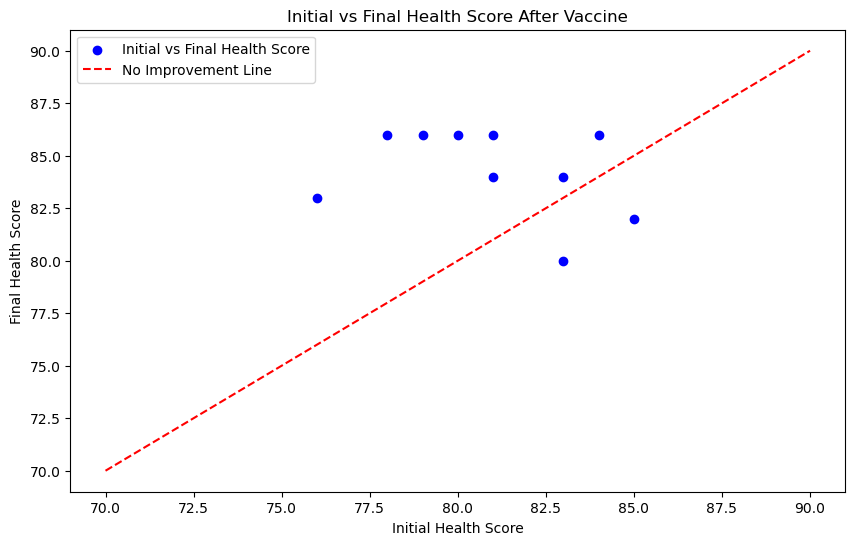

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Reading the CSV data
data = pd.read_csv('/home/jovyan/vaccine_data.csv')

# Display the first few rows of the data
print(data.head())

plt.figure(figsize=(10, 6))
plt.scatter(data['InitialHealthScore'], data['FinalHealthScore'], color='blue', label='Initial vs Final Health Score')
plt.plot([70, 90], [70, 90], color='red', linestyle='--', label='No Improvement Line')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.title('Initial vs Final Health Score After Vaccine')
plt.legend()
plt.show()

https://docs.google.com/document/d/1nxHZ6mbxU8YopF9F5u1zgMSZEcs8ui_508oSmKRG9bw/edit

# 9
9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

yes